## Paquetes Basicos

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Normalizar el tamaño de las imagenes

In [2]:
input_dir = r"D:\proyectoGrado\DatosAguacate"
categories = ['sin_plaga', 'plaga']

data_sin_plagas = []
data_plagas = []
labels_sin_plagas = []
labels_plagas = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)

        img = cv2.imread(img_path) 
        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        scaled_image = cv2.resize(src=image_rgb,  
                          dsize=(640, 640))
        if category == 'sin_plaga':
            data_sin_plagas.append(scaled_image.flatten())
            labels_sin_plagas.append(category_idx)
        else:
            data_plagas.append(scaled_image.flatten())
            labels_plagas.append(category_idx)

data_sin_plagas = np.asarray(data_sin_plagas)
labels_sin_plagas = np.asarray(labels_sin_plagas)
data_plagas = np.asarray(data_plagas)
labels_plagas = np.asarray(labels_plagas)

## Entrenar el modelo de regresión lógistica

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
matrices_confusion = []

# Repetir el proceso de entrenamiento y evaluación 10 veces
for _ in range(10):
    # Realizar subsampling en la clase mayoritaria
    indices_resample = np.random.choice(len(data_plagas), size=50, replace=True)
    
    data_plagas_resample = np.asarray(data_plagas)[indices_resample]
    labels_plagas_resample = np.asarray(labels_plagas)[indices_resample]

    # Combinar datos de 'sin_plaga' y datos resampleados de 'plaga'
    data_resample = np.concatenate([data_sin_plagas, data_plagas_resample])
    labels_resample = np.concatenate([labels_sin_plagas, labels_plagas_resample])

    # Dividir los datos en conjuntos de entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(
        data_resample, labels_resample, test_size=0.2, shuffle=True
    )

    # Inicializar el modelo de regresión logística
    modelo = LogisticRegression()

    # Entrenar el modelo
    modelo.fit(x_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = modelo.predict(x_test)

    # Calcular la matriz de confusión y almacenarla
    matriz_confusion = confusion_matrix(y_test, y_pred)
    matrices_confusion.append(matriz_confusion)

## Evaluación de desempeño

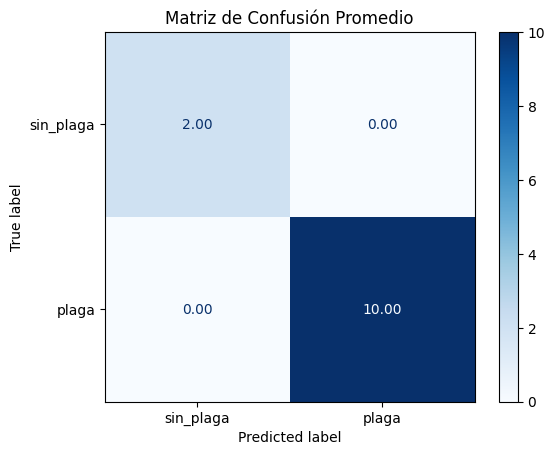

Accuracy promedio en 10 ejecuciones: 100.0
Precision promedio en 10 ejecuciones: 100.0
Recall promedio en 10 ejecuciones: 100.0


In [5]:
matriz_confusion_promedio = np.mean(matrices_confusion, axis=0)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_promedio, display_labels=['sin_plaga', 'plaga'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title('Matriz de Confusión Promedio')
plt.show()

# Calcular el recall para las plagas
recall = matriz_confusion_promedio[1, 1] / (matriz_confusion_promedio[1, 1] + matriz_confusion_promedio[1, 0])

# Calcular el accuracy
accuracy = (matriz_confusion_promedio[0, 0] + matriz_confusion_promedio[1, 1]) / np.sum(matriz_confusion_promedio)

# Calcular la precision
precision = matriz_confusion_promedio[1, 1] / (matriz_confusion_promedio[1, 1] + matriz_confusion_promedio[0, 1])


print(f'Accuracy promedio en 10 ejecuciones: {accuracy*100}')
print(f'Precision promedio en 10 ejecuciones: {precision*100}')
print(f'Recall promedio en 10 ejecuciones: {recall*100}')